# Brain Weight Calculation

The objective of this problem is to check how linearly head size is correlated with the Brain Weight by using Linear Regression Algorithm and find out R^2 and root mean square error.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load File

In [2]:
def load_file(file):
    return pd.read_csv(file)

In [3]:
train_file = 'headbrain.csv'

In [4]:
df = load_file(train_file)
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.shape

(237, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [7]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [8]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [9]:
len(X)

237

In [10]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    denom += (X[i] - mean_X) ** 2
    
b1 = numer/denom
b0 = mean_Y - (b1 * mean_X)

print(b1,b0)

0.26342933948939945 325.57342104944223


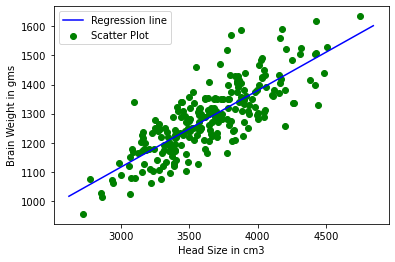

In [11]:
# Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values X and y
x = np.linspace(min_x,max_x,1000)
y = b0 + b1 * x

# Plotting line
plt.plot(x, y, color='blue', label='Regression line')
#Plotting Scatter Points
plt.scatter(X,Y,c='green',label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in gms')
plt.legend()
plt.show()

In [12]:
ss_t = 0
ss_r = 0
for i in range(len(X)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_Y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((len(X), 1))

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(X,Y)

LinearRegression()

In [16]:
y_pred = LR.predict(X)

### Check Accuracy

In [17]:
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2_score = LR.score(X, Y)
print("Root Mean Square Error: {}".format(rmse), "\nR^2 Score: {}".format(r2_score))

Root Mean Square Error: 72.1206213783709 
R^2 Score: 0.639311719957
